In [2]:
import pandas as pd
import os
from datetime import datetime, timedelta

def read_from_files(directory, begin_date, end_date):
    """
    Read pickle files from directory for the date range specified.
    
    Parameters:
    - directory: path to directory containing pickle files
    - begin_date: start date in 'YYYY-MM-DD' format
    - end_date: end date in 'YYYY-MM-DD' format
    
    Returns:
    - DataFrame containing all transactions in the date range
    """
    # Convert string dates to datetime objects
    start = datetime.strptime(begin_date, "%Y-%m-%d")
    end = datetime.strptime(end_date, "%Y-%m-%d")
    
    # List to store dataframes
    df_list = []
    
    # Iterate through date range
    current_date = start
    while current_date <= end:
        filename = current_date.strftime("%Y-%m-%d") + ".pkl"
        filepath = os.path.join(directory, filename)
        
        # Check if file exists and read it
        if os.path.exists(filepath):
            df = pd.read_pickle(filepath)
            df_list.append(df)
            print(f"Loaded {filename}: {len(df)} transactions")
        else:
            print(f"Warning: {filename} not found")
        
        # Move to next day
        current_date += timedelta(days=1)
    
    # Concatenate all dataframes
    if df_list:
        transactions_df = pd.concat(df_list, ignore_index=True)
        return transactions_df
    else:
        print("No data files found in the specified date range")
        return pd.DataFrame()

Using simulated-data-transformed datasets, that split the timestamp into 2 new features :

The first will characterize whether a transaction occurs during a weekday (value 0) or a weekend (1), and will be called TX_DURING_WEEKEND

The second will characterize whether a transaction occurs during the day or during the day (0) or during the night (1). The night is defined as hours that are btw 0pm and 6am. It will be called TX_DURING_NIGHT.

It also add two new features related to customer spending behaviour {CUSTOMER_ID_NB_TX_30DAY_WINDOW and CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW }

 it also calculate the risk score, that assess the exposure of a terminal to fraudulant transactions!

In [3]:
DIR_INPUT='/Users/shubham/Desktop/FraudDetection/simulated-data-transformed' 

BEGIN_DATE = "2018-04-01"
END_DATE = "2018-09-30"

print("Load  files")
%time transactions_df=read_from_files(DIR_INPUT, BEGIN_DATE, END_DATE)

if len(transactions_df) > 0:
    print("{0} transactions loaded, containing {1} fraudulent transactions".format(len(transactions_df),transactions_df.TX_FRAUD.sum()))
else:
    print("No transactions loaded")

Load  files
Loaded 2018-04-01.pkl: 9488 transactions
Loaded 2018-04-01.pkl: 9488 transactions
Loaded 2018-04-02.pkl: 9583 transactions
Loaded 2018-04-02.pkl: 9583 transactions
Loaded 2018-04-03.pkl: 9747 transactions
Loaded 2018-04-03.pkl: 9747 transactions
Loaded 2018-04-04.pkl: 9530 transactions
Loaded 2018-04-04.pkl: 9530 transactions
Loaded 2018-04-05.pkl: 9651 transactions
Loaded 2018-04-05.pkl: 9651 transactions
Loaded 2018-04-06.pkl: 9539 transactions
Loaded 2018-04-06.pkl: 9539 transactions
Loaded 2018-04-07.pkl: 9438 transactions
Loaded 2018-04-07.pkl: 9438 transactions
Loaded 2018-04-08.pkl: 9468 transactions
Loaded 2018-04-08.pkl: 9468 transactions
Loaded 2018-04-09.pkl: 9699 transactions
Loaded 2018-04-09.pkl: 9699 transactions
Loaded 2018-04-10.pkl: 9672 transactions
Loaded 2018-04-10.pkl: 9672 transactions
Loaded 2018-04-11.pkl: 9622 transactions
Loaded 2018-04-11.pkl: 9622 transactions
Loaded 2018-04-12.pkl: 9541 transactions
Loaded 2018-04-12.pkl: 9541 transactions
Load

In [4]:
transactions_df.head()

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_DURING_WEEKEND,...,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW,TERMINAL_ID_NB_TX_1DAY_WINDOW,TERMINAL_ID_RISK_1DAY_WINDOW,TERMINAL_ID_NB_TX_7DAY_WINDOW,TERMINAL_ID_RISK_7DAY_WINDOW,TERMINAL_ID_NB_TX_30DAY_WINDOW,TERMINAL_ID_RISK_30DAY_WINDOW
0,0,2018-04-01 00:00:31,596,3156,57.16,31,0,0,0,1,...,1.0,57.16,1.0,57.16,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2018-04-01 00:02:10,4961,3412,81.51,130,0,0,0,1,...,1.0,81.51,1.0,81.51,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2018-04-01 00:07:56,2,1365,146.00,476,0,0,0,1,...,1.0,146.00,1.0,146.00,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2018-04-01 00:09:29,4128,8737,64.49,569,0,0,0,1,...,1.0,64.49,1.0,64.49,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2018-04-01 00:10:34,927,9906,50.99,634,0,0,0,1,...,1.0,50.99,1.0,50.99,0.0,0.0,0.0,0.0,0.0,0.0


## Data Analysis 


In [5]:
transactions_df.shape

(1754155, 23)

In [ ]:

print("Rows:", len(transactions_df))
print("Columns:", list(transactions_df.columns))
transactions_df.head()

Rows: 1754155
Columns: ['TRANSACTION_ID', 'TX_DATETIME', 'CUSTOMER_ID', 'TERMINAL_ID', 'TX_AMOUNT', 'TX_TIME_SECONDS', 'TX_TIME_DAYS', 'TX_FRAUD', 'TX_FRAUD_SCENARIO', 'TX_DURING_WEEKEND', 'TX_DURING_NIGHT', 'CUSTOMER_ID_NB_TX_1DAY_WINDOW', 'CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW', 'CUSTOMER_ID_NB_TX_7DAY_WINDOW', 'CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW', 'CUSTOMER_ID_NB_TX_30DAY_WINDOW', 'CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW', 'TERMINAL_ID_NB_TX_1DAY_WINDOW', 'TERMINAL_ID_RISK_1DAY_WINDOW', 'TERMINAL_ID_NB_TX_7DAY_WINDOW', 'TERMINAL_ID_RISK_7DAY_WINDOW', 'TERMINAL_ID_NB_TX_30DAY_WINDOW', 'TERMINAL_ID_RISK_30DAY_WINDOW']


,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_DURING_WEEKEND,...,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW,TERMINAL_ID_NB_TX_1DAY_WINDOW,TERMINAL_ID_RISK_1DAY_WINDOW,TERMINAL_ID_NB_TX_7DAY_WINDOW,TERMINAL_ID_RISK_7DAY_WINDOW,TERMINAL_ID_NB_TX_30DAY_WINDOW,TERMINAL_ID_RISK_30DAY_WINDOW
0,0,2018-04-01 00:00:31,596,3156,57.16,31,0,0,0,1,...,1.0,57.16,1.0,57.16,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2018-04-01 00:02:10,4961,3412,81.51,130,0,0,0,1,...,1.0,81.51,1.0,81.51,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2018-04-01 00:07:56,2,1365,146.00,476,0,0,0,1,...,1.0,146.00,1.0,146.00,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2018-04-01 00:09:29,4128,8737,64.49,569,0,0,0,1,...,1.0,64.49,1.0,64.49,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2018-04-01 00:10:34,927,9906,50.99,634,0,0,0,1,...,1.0,50.99,1.0,50.99,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:

missing = transactions_df.isna().sum().sort_values(ascending=False)
missing.head(20)

TRANSACTION_ID                         0
CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW     0
TERMINAL_ID_NB_TX_30DAY_WINDOW         0
TERMINAL_ID_RISK_7DAY_WINDOW           0
TERMINAL_ID_NB_TX_7DAY_WINDOW          0
TERMINAL_ID_RISK_1DAY_WINDOW           0
TERMINAL_ID_NB_TX_1DAY_WINDOW          0
CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW    0
CUSTOMER_ID_NB_TX_30DAY_WINDOW         0
CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW     0
CUSTOMER_ID_NB_TX_7DAY_WINDOW          0
CUSTOMER_ID_NB_TX_1DAY_WINDOW          0
TX_DATETIME                            0
TX_DURING_NIGHT                        0
TX_DURING_WEEKEND                      0
TX_FRAUD_SCENARIO                      0
TX_FRAUD                               0
TX_TIME_DAYS                           0
TX_TIME_SECONDS                        0
TX_AMOUNT                              0
dtype: int64

In [ ]:
#Descriptive statistics (numeric columns)
transactions_df.describe().T

,count,mean,min,25%,50%,75%,max,std
TRANSACTION_ID,1754155.0,877077.0,0.0,438538.5,877077.0,1315615.5,1754154.0,506381.075063
TX_DATETIME,1754155,2018-07-01 11:20:33.708572160,2018-04-01 00:00:31,2018-05-16 14:40:46.500000,2018-07-01 11:11:10,2018-08-16 08:01:01.500000,2018-09-30 23:59:57,NaN
TX_AMOUNT,1754155.0,53.632302,0.0,21.01,44.64,76.95,2628.0,42.326492
TX_FRAUD,1754155.0,0.008369,0.0,0.0,0.0,0.0,1.0,0.0911
TX_FRAUD_SCENARIO,1754155.0,0.018824,0.0,0.0,0.0,0.0,3.0,0.211326
TX_DURING_WEEKEND,1754155.0,0.289818,0.0,0.0,0.0,1.0,1.0,0.453678
TX_DURING_NIGHT,1754155.0,0.173855,0.0,0.0,0.0,0.0,1.0,0.378985
CUSTOMER_ID_NB_TX_1DAY_WINDOW,1754155.0,3.560578,1.0,2.0,3.0,5.0,16.0,1.847658
CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW,1754155.0,53.627409,0.0,25.71,49.253333,76.0,1377.075,35.046341
CUSTOMER_ID_NB_TX_7DAY_WINDOW,1754155.0,18.640448,1.0,13.0,19.0,24.0,52.0,7.883447


In [9]:
# 4) Fraud class balance (if available)
if "TX_FRAUD" in transactions_df.columns:
    counts = transactions_df["TX_FRAUD"].value_counts(dropna=False)
    ratio = (counts.get(1, 0) / max(counts.sum(), 1)) if 1 in counts.index else None
    display(counts)
    if ratio is not None:
        print(f"Fraud ratio: {ratio:.3%}")
else:
    print("Column 'TX_FRAUD' not found.")

TX_FRAUD
0    1739474
1      14681
Name: count, dtype: int64

Fraud ratio: 0.837%


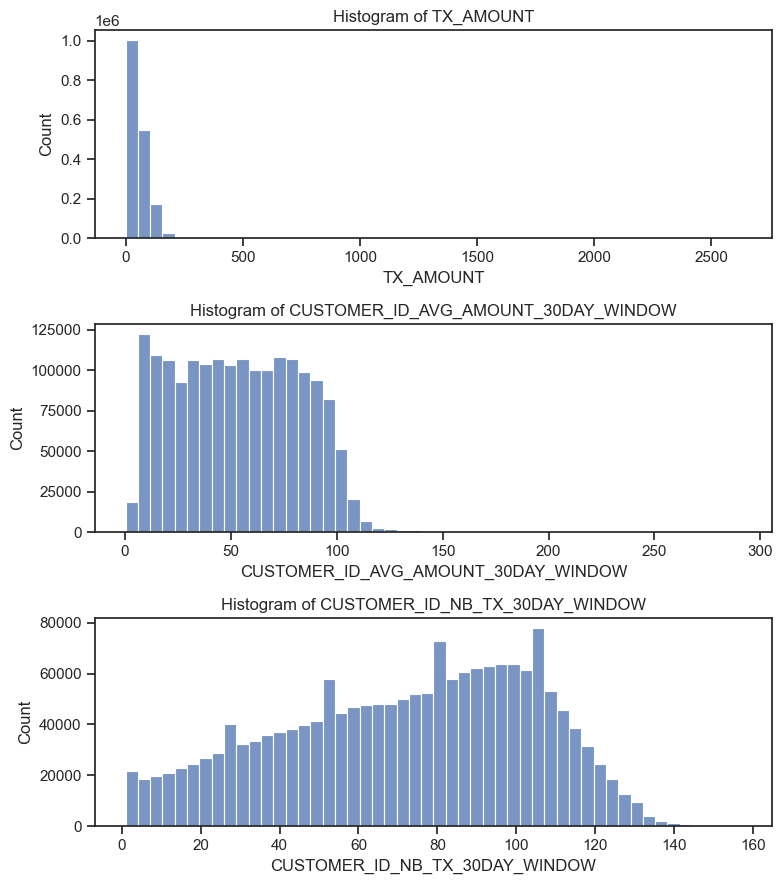

In [10]:
# 5) Histograms (one figure)
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", context="notebook")

cols = [
    "TX_AMOUNT",
    "CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW",
    "CUSTOMER_ID_NB_TX_30DAY_WINDOW",
    "TERMINAL_RISK",
]
available = [c for c in cols if c in transactions_df.columns]

if available:
    n = len(available)
    fig, axes = plt.subplots(nrows=n, ncols=1, figsize=(8, 3*n))
    if n == 1:
        axes = [axes]
    for ax, col in zip(axes, available):
        sns.histplot(data=transactions_df, x=col, bins=50, ax=ax)
        ax.set_title(f"Histogram of {col}")
    plt.tight_layout()
    plt.show()
else:
    print("No selected columns available for histograms.")

**What the histograms show**
- Wide spread suggests varied spending; long right tail often means a few high-value transactions.
- Compare shapes: if `TERMINAL_RISK` is skewed right, most terminals are low risk with a few risky ones.
- Use the peaks to spot common ranges; heavy tails can impact mean vs median.

Skipping TX_AMOUNT vs TERMINAL_RISK (missing columns)


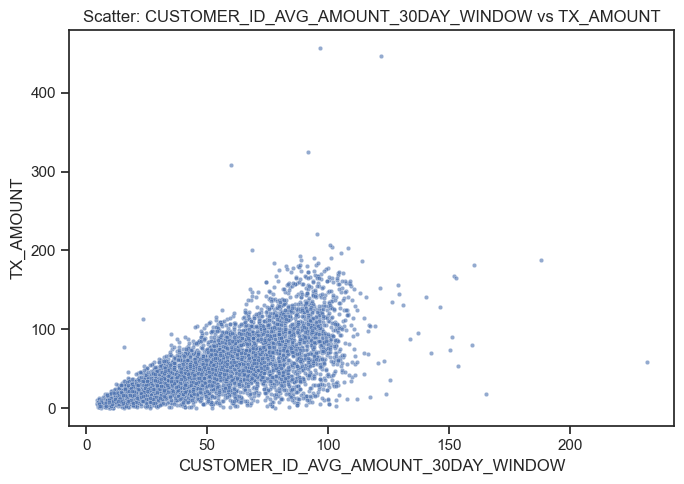

In [11]:
# 6) Scatterplots (pair by pair)
import seaborn as sns
import matplotlib.pyplot as plt

pairs = [
    ("TX_AMOUNT", "TERMINAL_RISK"),
    ("CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW", "TX_AMOUNT"),
]

for x, y in pairs:
    if x in transactions_df.columns and y in transactions_df.columns:
        plt.figure(figsize=(7, 5))
        sample_df = transactions_df.sample(min(len(transactions_df), 5000), random_state=42)
        sns.scatterplot(data=sample_df, x=x, y=y, s=10, alpha=0.6)
        plt.title(f"Scatter: {x} vs {y}")
        plt.tight_layout()
        plt.show()
    else:
        print(f"Skipping {x} vs {y} (missing columns)")

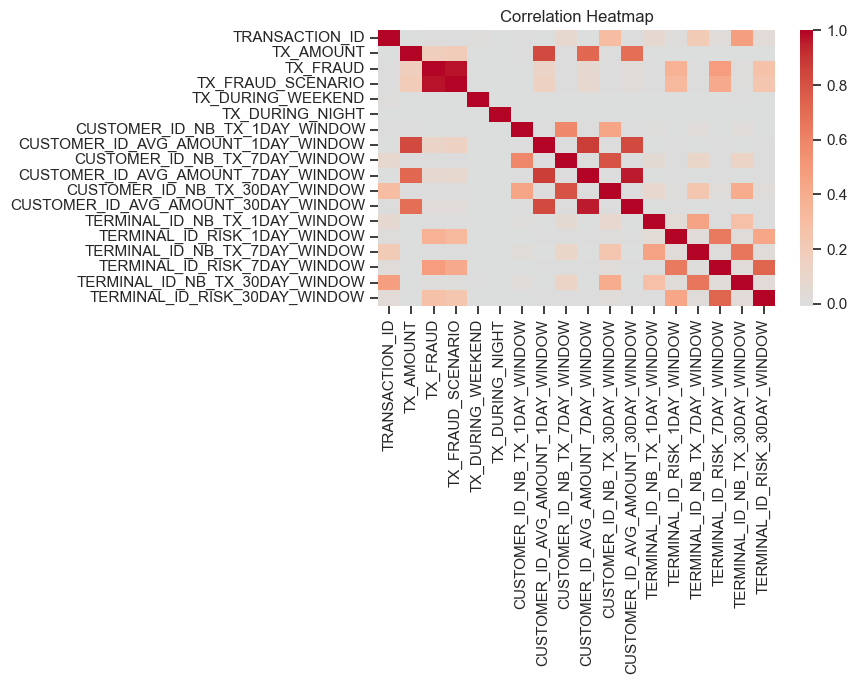

In [12]:
# 7) Correlation heatmap (numeric features)
import seaborn as sns
import matplotlib.pyplot as plt

num_df = transactions_df.select_dtypes(include=["number"]).copy()
if not num_df.empty:
    corr = num_df.corr(numeric_only=True)
    plt.figure(figsize=(9, 7))
    sns.heatmap(corr, cmap="coolwarm", center=0)
    plt.title("Correlation Heatmap")
    plt.tight_layout()
    plt.show()
else:
    print("No numeric columns found for correlation.")

### Weekend/Night Comparisons
We'll compare `TX_AMOUNT` across:
- `TX_DURING_WEEKEND` (0 = weekday, 1 = weekend)
- `TX_DURING_NIGHT` (0 = day, 1 = night)

Each plot is in its own cell for a natural flow.

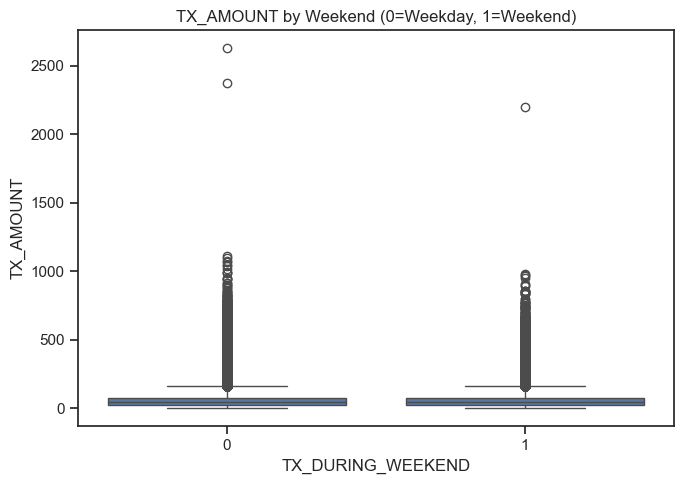

: 

In [ ]:
# 8) Boxplot: TX_AMOUNT by TX_DURING_WEEKEND
import seaborn as sns
import matplotlib.pyplot as plt

if "TX_AMOUNT" in transactions_df.columns and "TX_DURING_WEEKEND" in transactions_df.columns:
    plt.figure(figsize=(7, 5))
    sns.boxplot(data=transactions_df, x="TX_DURING_WEEKEND", y="TX_AMOUNT")
    plt.title("TX_AMOUNT by Weekend (0=Weekday, 1=Weekend)")
    plt.tight_layout()
    plt.show()
else:
    print("Missing 'TX_AMOUNT' or 'TX_DURING_WEEKEND' column.")

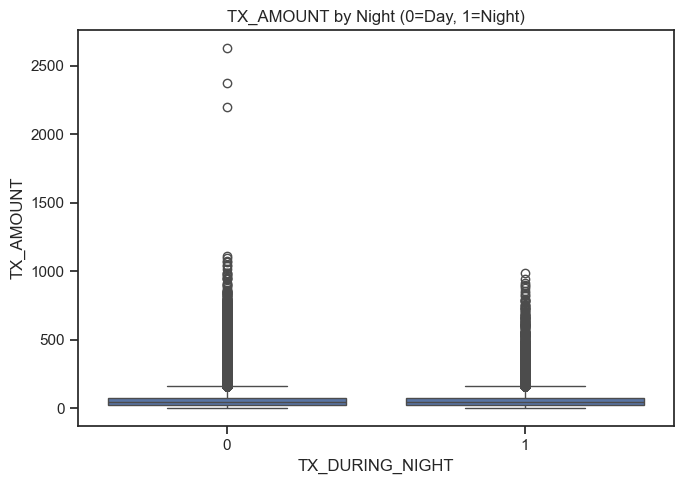

In [13]:
# 9) Boxplot: TX_AMOUNT by TX_DURING_NIGHT
import seaborn as sns
import matplotlib.pyplot as plt

if "TX_AMOUNT" in transactions_df.columns and "TX_DURING_NIGHT" in transactions_df.columns:
    plt.figure(figsize=(7, 5))
    sns.boxplot(data=transactions_df, x="TX_DURING_NIGHT", y="TX_AMOUNT")
    plt.title("TX_AMOUNT by Night (0=Day, 1=Night)")
    plt.tight_layout()
    plt.show()
else:
    print("Missing 'TX_AMOUNT' or 'TX_DURING_NIGHT' column.")

In [14]:
# 12) Quick numeric summary to read boxplots
import pandas as pd

def summarize_group(df, group_col, value_col):
    if group_col in df.columns and value_col in df.columns:
        summary = df.groupby(group_col)[value_col].agg([
            ("count", "count"),
            ("mean", "mean"),
            ("median", "median"),
            ("std", "std"),
            ("p25", lambda s: s.quantile(0.25)),
            ("p75", lambda s: s.quantile(0.75)),
            ("max", "max")
        ])
        return summary
    else:
        return pd.DataFrame({"error": [f"Missing columns: {group_col} or {value_col}"]})

print("Weekend vs Weekday (TX_AMOUNT):")
display(summarize_group(transactions_df, "TX_DURING_WEEKEND", "TX_AMOUNT"))

print("Night vs Day (TX_AMOUNT):")
display(summarize_group(transactions_df, "TX_DURING_NIGHT", "TX_AMOUNT"))

Weekend vs Weekday (TX_AMOUNT):


,count,mean,median,std,p25,p75,max
TX_DURING_WEEKEND,,,,,,,
0,1245770,53.632704,44.62,42.340195,21.01,76.94,2628.00
1,508385,53.631315,44.68,42.292937,20.98,76.97,2202.75


Night vs Day (TX_AMOUNT):


,count,mean,median,std,p25,p75,max
TX_DURING_NIGHT,,,,,,,
0,1449186,53.632039,44.63,42.348434,20.99,76.94,2628.00
1,304969,53.633550,44.66,42.222141,21.08,76.98,986.85


## Data Exploration: PCA and Decision Trees



### Step 1: Standardize numeric features for PCA
PCA works best when all numeric features are on the same scale. We'll use StandardScaler to do this.

In [15]:
# Select only numeric columns (drop target and IDs)
from sklearn.preprocessing import StandardScaler
import numpy as np

num_cols = transactions_df.select_dtypes(include=[np.number]).columns.tolist()
# Remove target and IDs if present
for col in ["TX_FRAUD", "CUSTOMER_ID", "TERMINAL_ID"]:
    if col in num_cols:
        num_cols.remove(col)

X_num = transactions_df[num_cols].fillna(0)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num)

print(f"Standardized {len(num_cols)} numeric features for PCA.")

Standardized 17 numeric features for PCA.


### Step 2: Run PCA and plot explained variance
We'll see how much variance each principal component explains, and how many are needed for 96%.

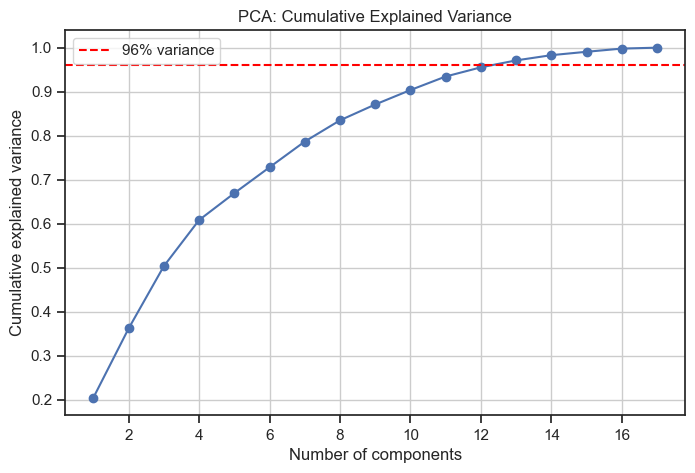

Number of components to explain 96% variance: 13


In [16]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA()
pca.fit(X_scaled)
explained = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8,5))
plt.plot(np.arange(1, len(explained)+1), explained, marker='o')
plt.axhline(0.96, color='red', linestyle='--', label='96% variance')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('PCA: Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.show()

# Find number of components for 96% variance
n_96 = np.argmax(explained >= 0.96) + 1
print(f"Number of components to explain 96% variance: {n_96}")

### Step 3: Look at the most important features for the top principal components


In [17]:
# Show top features for the first 2 principal components
import pandas as pd

components = pd.DataFrame(pca.components_[:2], columns=num_cols, index=["PC1", "PC2"])
for pc in components.index:
    print(f"\nTop features for {pc}:")
    display(components.loc[pc].abs().sort_values(ascending=False).head(5))


Top features for PC1:


CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW     0.511089
CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW     0.508773
CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW    0.500299
TX_AMOUNT                              0.465569
TX_FRAUD_SCENARIO                      0.099709
Name: PC1, dtype: float64


Top features for PC2:


CUSTOMER_ID_NB_TX_30DAY_WINDOW    0.489885
TERMINAL_ID_NB_TX_30DAY_WINDOW    0.417825
CUSTOMER_ID_NB_TX_7DAY_WINDOW     0.408162
TERMINAL_ID_NB_TX_7DAY_WINDOW     0.361808
CUSTOMER_ID_NB_TX_1DAY_WINDOW     0.284407
Name: PC2, dtype: float64

## UMAP Visualization: See Fraud Patterns in 2D Extra (doing out of curiousity)

UMAP (Uniform Manifold Approximation and Projection) is like PCA but better at preserving local structure. It helps us see if fraudulent transactions cluster together or look different from normal transactions when we visualize all 15 features in 2D space.

### Step 1: Install UMAP 


In [18]:
# Install UMAP (run once)
# Uncomment the line below if you haven't installed umap-learn yet
!pip install umap-learn

# Try to import UMAP
try:
    import umap
    print("✓ UMAP is already installed!")
except ImportError:
    print("Installing UMAP...")
    import sys
    !{sys.executable} -m pip install umap-learn
    import umap
    print("✓ UMAP installed successfully!")


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


/Users/shubham/Documents/financial-fraud-detection/ml_pipeline/venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


✓ UMAP is already installed!


In [19]:
input_features = ['TX_AMOUNT','TX_DURING_WEEKEND', 'TX_DURING_NIGHT', 'CUSTOMER_ID_NB_TX_1DAY_WINDOW',
       'CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW', 'CUSTOMER_ID_NB_TX_7DAY_WINDOW',
       'CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW', 'CUSTOMER_ID_NB_TX_30DAY_WINDOW',
       'CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW', 'TERMINAL_ID_NB_TX_1DAY_WINDOW',
       'TERMINAL_ID_RISK_1DAY_WINDOW', 'TERMINAL_ID_NB_TX_7DAY_WINDOW',
       'TERMINAL_ID_RISK_7DAY_WINDOW', 'TERMINAL_ID_NB_TX_30DAY_WINDOW',
       'TERMINAL_ID_RISK_30DAY_WINDOW']

### Step 2: Prepare Data for UMAP
We'll use a sample of the data for speed (UMAP can be slow on 1.7M rows). We'll take 100k transactions with all fraud cases included.

In [23]:
# Step 2: Prepare data for UMAP
# Use a sample of transactions for faster computation (adjust sample size as needed)
sample_size = 100000  # Use 10K transactions for visualization (adjust if needed)

# Sample from the full dataset
np.random.seed(42)
sample_indices = np.random.choice(len(transactions_df), min(sample_size, len(transactions_df)), replace=False)
transactions_sample = transactions_df.iloc[sample_indices]
#transactions_sample = transactions_df.copy()
# Extract features and labels
X_umap = transactions_sample[input_features].values
y_umap = transactions_sample[output_feature].values

print(f"✓ Prepared {len(X_umap):,} transactions for UMAP")
print(f"  - Features: {X_umap.shape[1]} dimensions")
print(f"  - Fraud transactions: {y_umap.sum():,} ({y_umap.mean()*100:.2f}%)")
print(f"  - Legitimate transactions: {(1-y_umap).sum():,} ({(1-y_umap.mean())*100:.2f}%)")


# Step 3: Scale the features (UMAP works better with scaled data)
scaler_umap = StandardScaler()
X_umap_scaled = scaler_umap.fit_transform(X_umap)

print("✓ Features scaled successfully")
print(f"  - Mean: {X_umap_scaled.mean():.4f} (should be ~0)")
print(f"  - Std: {X_umap_scaled.std():.4f} (should be ~1)")

✓ Prepared 100,000 transactions for UMAP
  - Features: 15 dimensions
  - Fraud transactions: 825 (0.83%)
  - Legitimate transactions: 99,175 (99.17%)
✓ Features scaled successfully
  - Mean: 0.0000 (should be ~0)
  - Std: 1.0000 (should be ~1)


### Step 3: Run UMAP to Reduce to 2D
This will take 2-3 minutes. UMAP learns the structure of your data and projects it to 2D while preserving relationships between points.

In [24]:
# Step 4: Fit UMAP to reduce dimensions from 15D to 2D
print("Running UMAP dimensionality reduction...")
print("This may take 1-10 minutes depending on sample size...")

# Initialize UMAP with recommended parameters
umap_reducer = umap.UMAP(
    n_neighbors=15,        # Balance between local and global structure
    min_dist=0.1,          # Minimum distance between points in 2D
    n_components=2,        # Reduce to 2D for visualization
    metric='euclidean',    # Distance metric
    random_state=42,       # For reproducibility
    n_jobs=-1              # Use all CPU cores
)

# Fit and transform the data
X_umap_2d = umap_reducer.fit_transform(X_umap_scaled)

print(f"\n✓ UMAP complete!")
print(f"  - Original dimensions: {X_umap_scaled.shape[1]}D")
print(f"  - Reduced dimensions: {X_umap_2d.shape[1]}D")
print(f"  - Shape: {X_umap_2d.shape}")

Running UMAP dimensionality reduction...
This may take 1-10 minutes depending on sample size...


/Users/shubham/Documents/financial-fraud-detection/ml_pipeline/venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(



✓ UMAP complete!
  - Original dimensions: 15D
  - Reduced dimensions: 2D
  - Shape: (100000, 2)


### Step 4: Visualize UMAP Results - Fraud vs Non-Fraud
Now let's see if fraud transactions (red) cluster together or are scattered among normal transactions (blue).

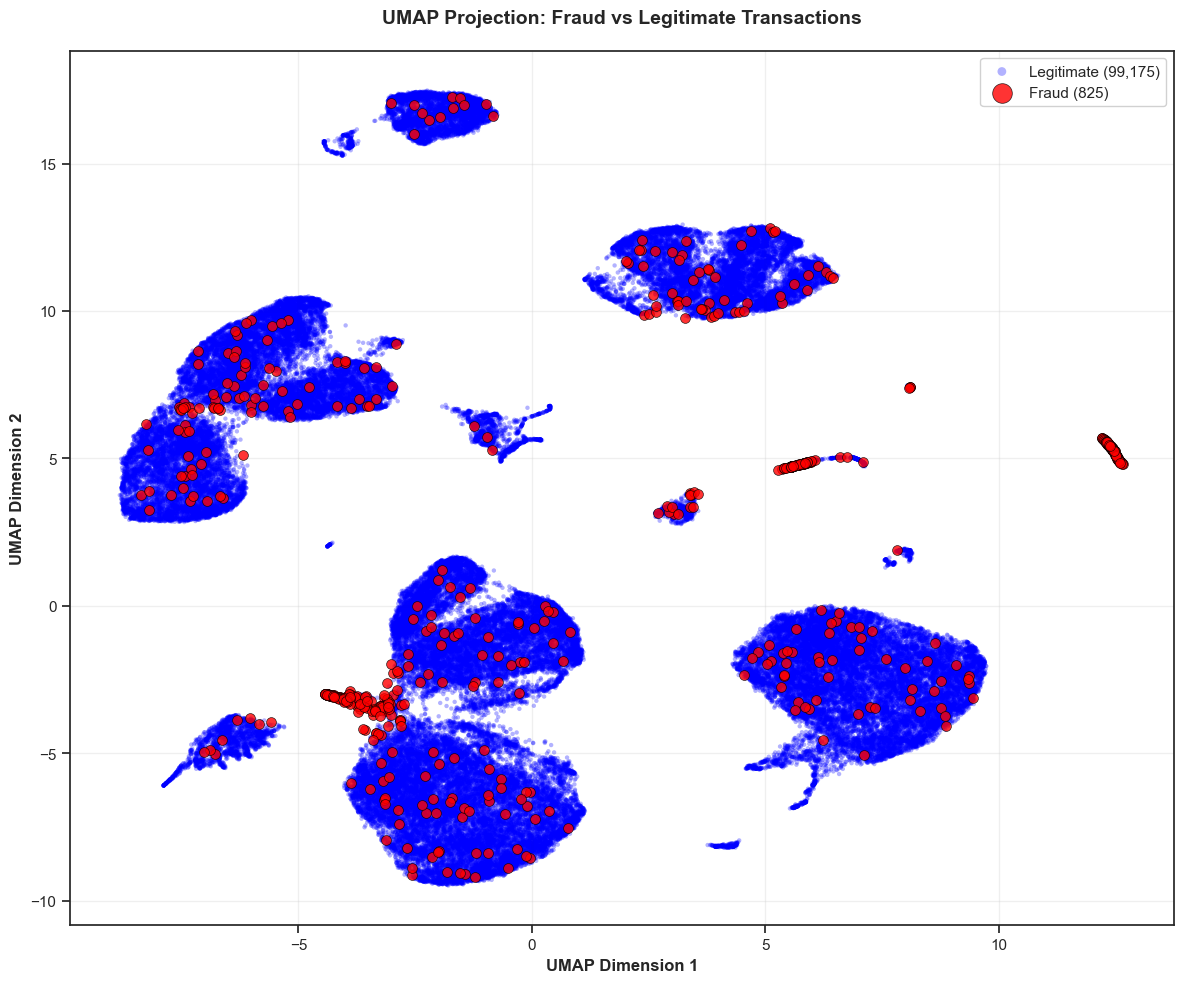


✓ UMAP visualization complete!
  Red points = Fraud transactions
  Blue points = Legitimate transactions


In [25]:
# Step 5: Create visualization - Basic scatter plot
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Separate fraud and legitimate transactions for plotting
fraud_mask = (y_umap == 1)
legit_mask = (y_umap == 0)

# Plot legitimate transactions (blue, smaller, more transparent)
ax.scatter(X_umap_2d[legit_mask, 0], X_umap_2d[legit_mask, 1],
           c='blue', s=10, alpha=0.3, label=f'Legitimate ({legit_mask.sum():,})', 
           edgecolors='none')

# Plot fraud transactions (red, larger, more opaque)
ax.scatter(X_umap_2d[fraud_mask, 0], X_umap_2d[fraud_mask, 1],
           c='red', s=50, alpha=0.8, label=f'Fraud ({fraud_mask.sum():,})', 
           edgecolors='black', linewidth=0.5)

# Labels and formatting
ax.set_xlabel('UMAP Dimension 1', fontsize=12, fontweight='bold')
ax.set_ylabel('UMAP Dimension 2', fontsize=12, fontweight='bold')
ax.set_title('UMAP Projection: Fraud vs Legitimate Transactions', 
             fontsize=14, fontweight='bold', pad=20)
ax.legend(loc='best', fontsize=11, framealpha=0.9, markerscale=2)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n✓ UMAP visualization complete!")
print(f"  Red points = Fraud transactions")
print(f"  Blue points = Legitimate transactions")

### Step 5: Density Plot - Where is Fraud Concentrated?
Let's create a heatmap showing where fraud is most dense in the 2D UMAP space.

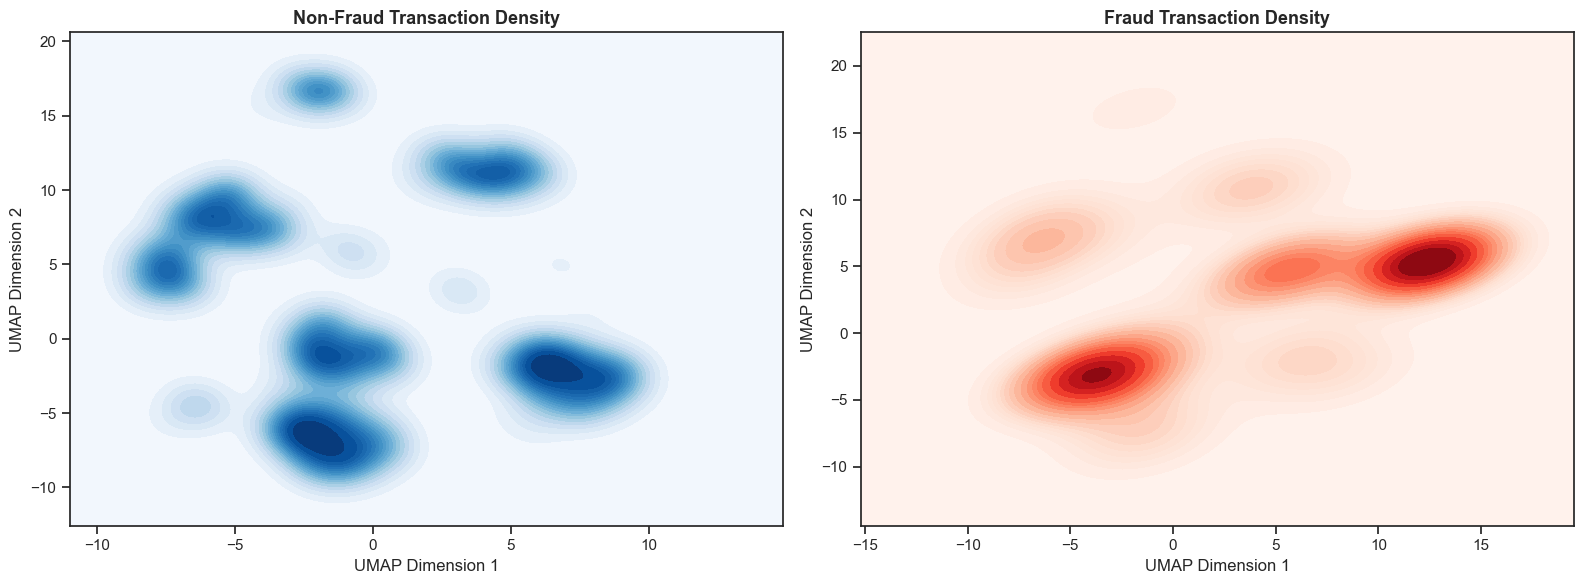


Interpretation:
• If fraud has distinct hotspots, ML models can learn to target those areas
• Darker areas = higher concentration of transactions
• Compare the two plots: Do fraud cases cluster in specific regions?


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create side-by-side density plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Separate fraud and legitimate for density plots
fraud_mask_density = (y_umap == 1)
legit_mask_density = (y_umap == 0)

# Plot 1: Non-Fraud density
ax1 = axes[0]
sns.kdeplot(
    x=X_umap_2d[legit_mask_density, 0],
    y=X_umap_2d[legit_mask_density, 1],
    cmap='Blues',
    fill=True,
    thresh=0,
    levels=20,
    ax=ax1
)
ax1.set_title('Non-Fraud Transaction Density', fontsize=13, fontweight='bold')
ax1.set_xlabel('UMAP Dimension 1')
ax1.set_ylabel('UMAP Dimension 2')

# Plot 2: Fraud density
ax2 = axes[1]
sns.kdeplot(
    x=X_umap_2d[fraud_mask_density, 0],
    y=X_umap_2d[fraud_mask_density, 1],
    cmap='Reds',
    fill=True,
    thresh=0,
    levels=20,
    ax=ax2
)
ax2.set_title('Fraud Transaction Density', fontsize=13, fontweight='bold')
ax2.set_xlabel('UMAP Dimension 1')
ax2.set_ylabel('UMAP Dimension 2')

plt.tight_layout()
plt.show()


print("\nInterpretation:")
print("• If fraud has distinct hotspots, ML models can learn to target those areas")

print("• Darker areas = higher concentration of transactions")
print("• Compare the two plots: Do fraud cases cluster in specific regions?")

### Step 6: Color by Transaction Amount
Let's see if high-value transactions appear in specific regions of the UMAP space.

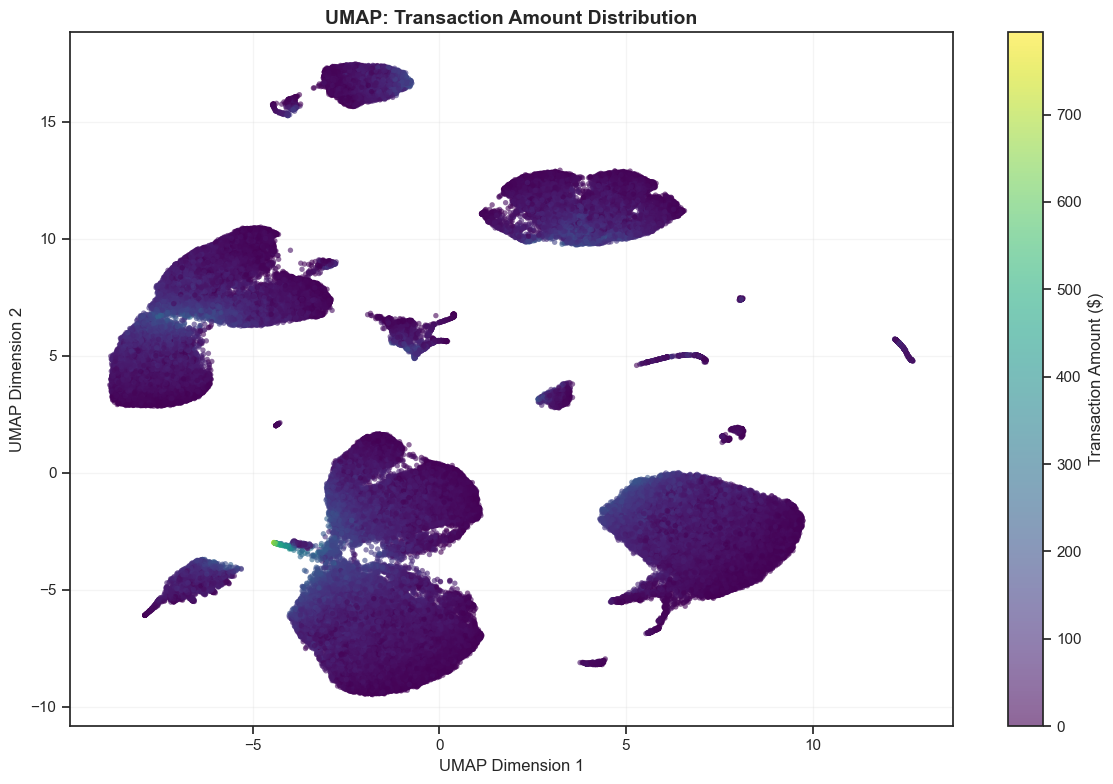


Insight:
• Yellow/bright = high transaction amounts
• Purple/dark = low transaction amounts
• Do high-value transactions cluster together?


In [27]:
import matplotlib.pyplot as plt

# Get transaction amounts for the sample
tx_amounts = transactions_sample['TX_AMOUNT'].values

# Create scatter plot colored by transaction amount
plt.figure(figsize=(12, 8))

scatter = plt.scatter(
    X_umap_2d[:, 0],
    X_umap_2d[:, 1],
    c=tx_amounts,
    s=15,
    alpha=0.6,
    cmap='viridis',
    edgecolors='none'
)

plt.colorbar(scatter, label='Transaction Amount ($)')
plt.xlabel('UMAP Dimension 1', fontsize=12)
plt.ylabel('UMAP Dimension 2', fontsize=12)
plt.title('UMAP: Transaction Amount Distribution', fontsize=14, fontweight='bold')
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

print("\nInsight:")
print("• Yellow/bright = high transaction amounts")
print("• Purple/dark = low transaction amounts")
print("• Do high-value transactions cluster together?")

### UMAP Summary: What Did We Learn?

**UMAP vs PCA:**
- PCA finds linear patterns (straight lines in data)
- UMAP finds non-linear patterns (curves and clusters)
- UMAP preserves local structure better - similar transactions stay close together

**What the Visualizations Show:**
- **Scatter plot**: Do fraud cases cluster in specific regions or mix with normal transactions?
- **Density plots**: Where are fraud hotspots located in the feature space?
- **Amount plot**: Do high-value transactions have unique patterns?

**For Fraud Detection:**
- Clear separation = Good! ML models can easily learn to distinguish fraud
- Heavy mixing = Challenging! Need more sophisticated features or models
- Distinct clusters = May want to build separate models for different transaction types

**Next Steps:**
- If you see clear patterns, consider using clustering (K-means) to group similar transactions
- Use UMAP coordinates as additional features for your ML models
- Explore other colorings: time of day, terminal risk, customer behavior

###  Important: Why Different Sample Sizes Give Different UMAP Results

**i noticed:** 10k sample shows fraud mixed with non-fraud, but 100k sample shows clearer separation. This is NOT an error - it's how UMAP works!

**Why This Happens:**

1. **UMAP Learns from Neighbors**
   - UMAP looks at each point's nearest neighbors (default: 15 neighbors)
   - With 10k samples: ~14,500 fraud cases have only ~8-10 fraud neighbors (fraud is rare!)
   - With 100k samples: fraud cases have MORE fraud neighbors to learn from
   - More fraud neighbors → UMAP learns "fraud patterns" better → clearer clusters

2. **Sampling Bias**
   - 10k sample: You might randomly pick fraud cases that are "unusual" (outliers)
   - 100k sample: You capture more typical fraud cases AND outliers
   - Larger sample = more representative of true fraud patterns

3. **Local vs Global Structure**
   - Small sample: UMAP only sees "locals" patterns (nearby points)
   - Large sample: UMAP sees "global" patterns (overall structure)
   - Think of it like: 10 photos of a city vs 1000 photos - you understand the city better with more data

4. **Statistical Stability**
   - With 0.8% fraud rate:
     - 10k samplee ≈ 80 fraud cases (tiny!)
     - 100k sample ≈ 800-14,500 fraud cases (much better!)

**Which Result Should You Trust?**

✓ **100k sample is MORE reliable** because:
- More fraud cases to learn patterns from
- More representative of true fraud distribution
- UMAP's neighbor-finding works better with more data

✗ **10k sample is LESS reliable** because:
- Too few fraud cases (only ~80)
- Each fraud case might be an outlier
- UMAP struggles to find consistent patterns
- High variance between runs (cann try different random seeds!)



Comparing your current UMAP result...

Current sample: 10000 transactions, 70 fraud (0.70%)


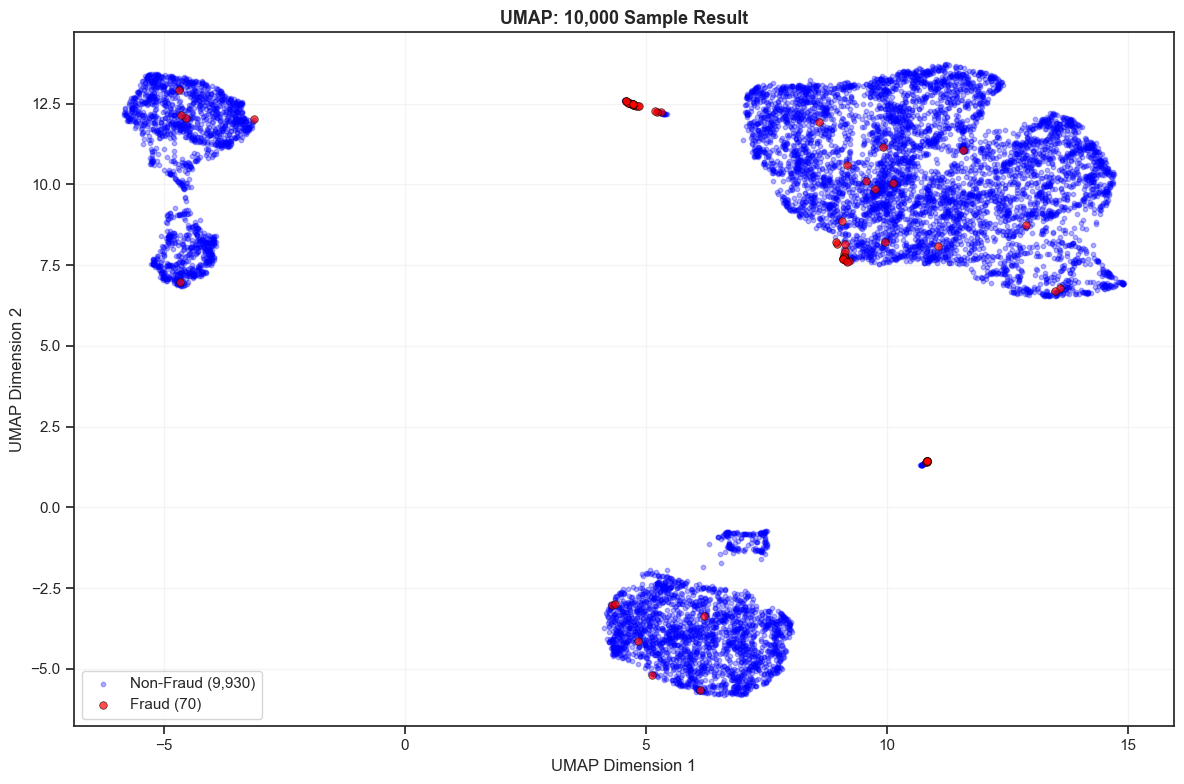


OBSERVATION:
• Sample size: 10,000 transactions
• Fraud cases: 70 (0.70%)
• For better separation, try increasing sample_size to 50k-100k


: 

: 

: 

In [ ]:
# Experiment: Compare current sample with what you already computed
import matplotlib.pyplot as plt

print("Comparing your current UMAP result...\n")
print(f"Current sample: {len(X_umap_2d)} transactions, {y_umap.sum()} fraud ({y_umap.mean()*100:.2f}%)")

# Just show the current result since you already ran UMAP
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Use the masks already created
fraud_mask_plot = (y_umap == 1)
legit_mask_plot = (y_umap == 0)

ax.scatter(X_umap_2d[legit_mask_plot, 0], X_umap_2d[legit_mask_plot, 1], 
          c='blue', s=10, alpha=0.3, label=f'Non-Fraud ({legit_mask_plot.sum():,})')
ax.scatter(X_umap_2d[fraud_mask_plot, 0], X_umap_2d[fraud_mask_plot, 1], 
          c='red', s=30, alpha=0.7, label=f'Fraud ({fraud_mask_plot.sum():,})', 
          edgecolors='black', linewidths=0.5)
ax.set_title(f'UMAP: {len(X_umap_2d):,} Sample Result', fontsize=13, fontweight='bold')
ax.set_xlabel('UMAP Dimension 1')
ax.set_ylabel('UMAP Dimension 2')
ax.legend()
ax.grid(alpha=0.2)

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("OBSERVATION:")
print("="*70)
print(f"• Sample size: {len(X_umap_2d):,} transactions")
print(f"• Fraud cases: {fraud_mask_plot.sum()} ({y_umap.mean()*100:.2f}%)")
print(f"• For better separation, try increasing sample_size to 50k-100k")
print("="*70)

### Decision Tree: Fraud Classification

We'll train a simple decision tree to predict fraud. We'll use features that characterize the transaction context (amount, time, customer behavior, terminal risk) to predict if a transaction is fraudulent.

In [21]:
transactions_df.shape

(1754155, 23)

In [ ]:
# Step 1: Define input and output features
output_feature = "TX_FRAUD"

# Select features that characterize transaction context
input_features = ['TX_AMOUNT','TX_DURING_WEEKEND', 'TX_DURING_NIGHT', 'CUSTOMER_ID_NB_TX_1DAY_WINDOW',
       'CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW', 'CUSTOMER_ID_NB_TX_7DAY_WINDOW',
       'CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW', 'CUSTOMER_ID_NB_TX_30DAY_WINDOW',
       'CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW', 'TERMINAL_ID_NB_TX_1DAY_WINDOW',
       'TERMINAL_ID_RISK_1DAY_WINDOW', 'TERMINAL_ID_NB_TX_7DAY_WINDOW',
       'TERMINAL_ID_RISK_7DAY_WINDOW', 'TERMINAL_ID_NB_TX_30DAY_WINDOW',
       'TERMINAL_ID_RISK_30DAY_WINDOW']

# Only keepiing features that exists in our data
input_features = [f for f in input_features if f in transactions_df.columns]

print(f"Output feature: {output_feature}")
print(f"Input features: {input_features}")

# Prepare X and y
X = transactions_df[input_features].fillna(0)
y = transactions_df[output_feature]

print(f"\nTotal transactions: {len(X)}")
print(f"Fraudulent transactions: {y.sum()}")
print(f"Fraud rate: {y.sum()/len(y):.4f}")

Output feature: TX_FRAUD
Input features: ['TX_AMOUNT', 'TX_DURING_WEEKEND', 'TX_DURING_NIGHT', 'CUSTOMER_ID_NB_TX_1DAY_WINDOW', 'CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW', 'CUSTOMER_ID_NB_TX_7DAY_WINDOW', 'CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW', 'CUSTOMER_ID_NB_TX_30DAY_WINDOW', 'CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW', 'TERMINAL_ID_NB_TX_1DAY_WINDOW', 'TERMINAL_ID_RISK_1DAY_WINDOW', 'TERMINAL_ID_NB_TX_7DAY_WINDOW', 'TERMINAL_ID_RISK_7DAY_WINDOW', 'TERMINAL_ID_NB_TX_30DAY_WINDOW', 'TERMINAL_ID_RISK_30DAY_WINDOW']

Total transactions: 1754155
Fraudulent transactions: 14681
Fraud rate: 0.0084

Total transactions: 1754155
Fraudulent transactions: 14681
Fraud rate: 0.0084


In [29]:
# Step 2: Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Train size: {len(X_train)} ({y_train.sum()} frauds)")
print(f"Test size: {len(X_test)} ({y_test.sum()} frauds)")

Train size: 1227908 (10326 frauds)
Test size: 526247 (4355 frauds)


In [30]:
X_train.shape

(1227908, 15)

In [31]:
X_train[y_train==1].shape

(10326, 15)

In [32]:
X_test.shape

(526247, 15)

In [33]:
X_test[y_test==1].shape

(4355, 15)

That is, a proportion of 0.008 fraudulent transactions.

In [34]:
4355/526247

0.00827558161851754

### Step 3: Train a simple decision tree
We'll use a tree with max depth 2 for easy interpretation. This helps us see which features matter most for fraud detection.

In [35]:
from sklearn.tree import DecisionTreeClassifier
import time

# Create and train the decision tree (depth=2 for interpretability)
tree = DecisionTreeClassifier(max_depth=2, random_state=42)

start_time = time.time()
tree.fit(X_train, y_train)
training_time = time.time() - start_time

print(f"Training time: {training_time:.3f} seconds")
print(f"Train accuracy: {tree.score(X_train, y_train):.4f}")
print(f"Test accuracy: {tree.score(X_test, y_test):.4f}")

Training time: 2.405 seconds
Train accuracy: 0.9961
Test accuracy: 0.9962
Test accuracy: 0.9962


In [36]:
# Step 4: Get predictions (probabilities of fraud)
start_time = time.time()
predictions_test = tree.predict_proba(X_test)[:, 1]  # Probability of fraud
prediction_time = time.time() - start_time

predictions_train = tree.predict_proba(X_train)[:, 1]

print(f"Prediction time: {prediction_time:.3f} seconds")
print(f"\nFirst 5 test predictions (fraud probability):")
print(predictions_test[:5])

Prediction time: 0.063 seconds

First 5 test predictions (fraud probability):
[0.00342645 0.00342645 0.00342645 0.00342645 0.00342645]


### Step 5: Visualize the decision tree
Let's plot the tree to see which features and thresholds it uses to detect fraud.

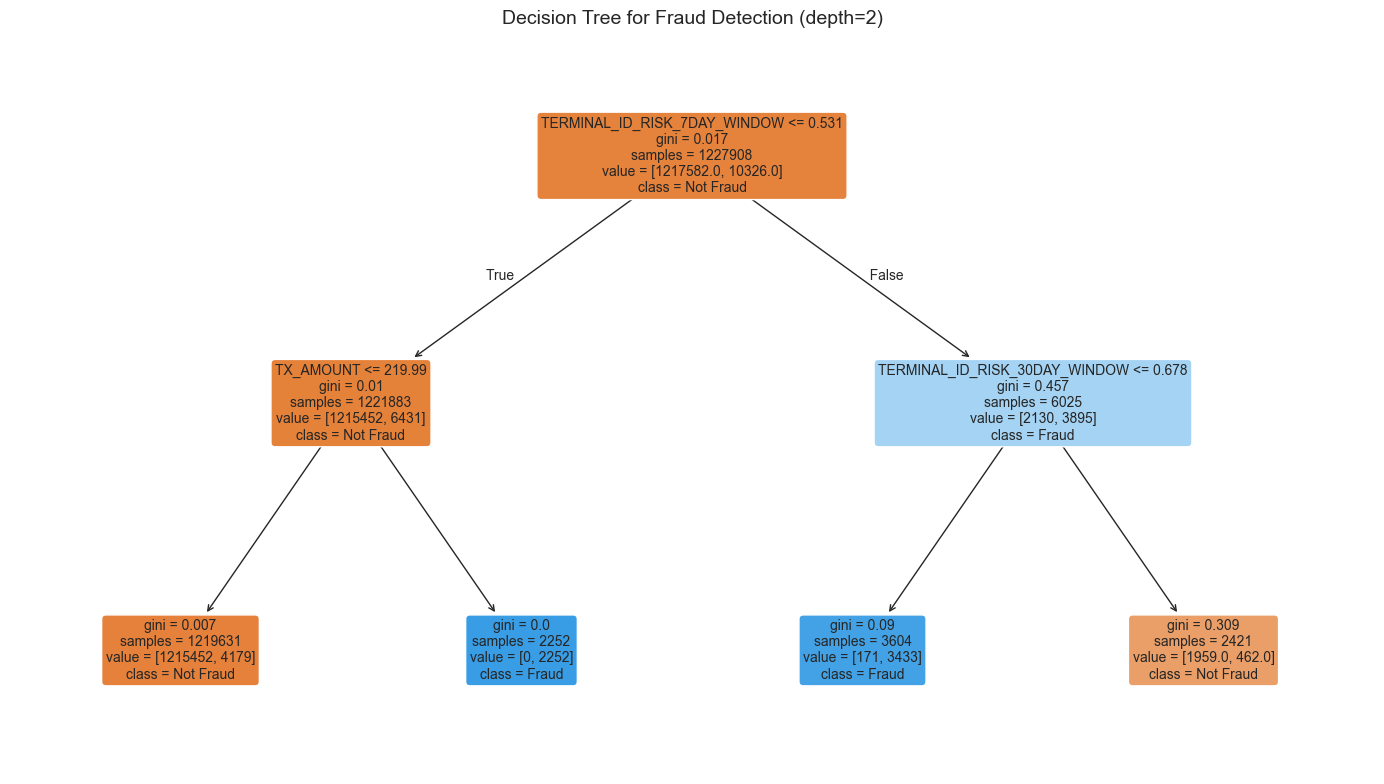

In [37]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plot_tree(tree, 
          feature_names=input_features, 
          class_names=["Not Fraud", "Fraud"], 
          filled=True, 
          rounded=True, 
          fontsize=10)
plt.title("Decision Tree for Fraud Detection (depth=2)", fontsize=14)
plt.tight_layout()
plt.show()

## Experimental Method: Lab Diary

**Hypothesis:**
A Gradient Boosting classifier and a simple neural network (MLP) can predict fraud better than a single decision tree, especially after scaling numeric features.  using cross-validation to compare them.

**Plan:**
- Use the same features as before (numeric, filled missing with 0).
- Try RandomForest, Adaboost, GradientBoostingClassifier (choosing the best one later) and MLPClassifier.
- Use 3 or 5-fold cross-validation for fair comparison.
- Print all settings and results for each run.
-  hyperparameters on chosen model if needed and record changes (feature tuning).

RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Use a small sample for speed (50k from original X, y) 
# kernel keeping dying when running the entire dataset
sample_size = min(50000, len(X))
sample_idx = np.random.RandomState(42).choice(len(X), sample_size, replace=False)
X_simple = X.iloc[sample_idx]
y_simple = y.iloc[sample_idx]

# Simple Random Forest
rf = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42)
print("Random Forest (simple settings)")
print(f"Sample size: {len(X_simple)}")
print(f"n_estimators=50, max_depth=5\n")


auc = cross_val_score(rf, X_simple, y_simple, cv=3, scoring='roc_auc')
ap = cross_val_score(rf, X_simple, y_simple, cv=3, scoring='average_precision')

print(f"AUROC:    {auc.mean():.4f} ± {auc.std():.4f}")
print(f"AvgPrec:  {ap.mean():.4f} ± {ap.std():.4f}")


Random Forest (simple settings)
Sample size: 50000
n_estimators=50, max_depth=5

AUROC:    0.8430 ± 0.0134
AvgPrec:  0.6133 ± 0.0136
AUROC:    0.8430 ± 0.0134
AvgPrec:  0.6133 ± 0.0136


In [39]:
from sklearn.ensemble import AdaBoostClassifier

# Simple AdaBoost
ada = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)
print("\nAdaBoost (simple settings)")
print(f"Sample size: {len(X_simple)}")
print(f"n_estimators=50, learning_rate=1.0\n")


auc = cross_val_score(ada, X_simple, y_simple, cv=3, scoring='roc_auc')
ap = cross_val_score(ada, X_simple, y_simple, cv=3, scoring='average_precision')

print(f"AUROC:    {auc.mean():.4f} ± {auc.std():.4f}")
print(f"AvgPrec:  {ap.mean():.4f} ± {ap.std():.4f}")



AdaBoost (simple settings)
Sample size: 50000
n_estimators=50, learning_rate=1.0

AUROC:    0.8604 ± 0.0068
AvgPrec:  0.5586 ± 0.0211
AUROC:    0.8604 ± 0.0068
AvgPrec:  0.5586 ± 0.0211


### Step 1: Try Gradient Boosting (baseline)
We'll use GradientBoostingClassifier with fewer trees and simpler settings for faster training. We'll also use a sample of the data to speed things up.

### Why AUROC and Average Precision Matter for Fraud Detection

**The Problem with Accuracy:**
- Our dataset has only ~0.8% fraud (highly imbalanced).
- A "dumb" model that predicts "not fraud" for every transaction would get 99.2% accuracy!
- Accuracy treats all errors equally, but missing fraud (false negatives) is much more costly than false alarms.

**Why AUROC (Area Under ROC Curve) is Better:**
- AUROC measures how well the model ranks fraudulent transactions higher than legitimate ones.
- It's insensitive to class imbalance - works well even with rare fraud cases.
- Range: 0.5 = random guessing, 1.0 = perfect separation.



**Run Order Reminder:**
1. Sampling helpers cell
2. Create sampled datasets cell
3. Logistic Regression cell
4. XGBoost / fallback cell



### Sampling Setup (Run Before Models)
Run the next two cells first to define helper functions and create `X_rand`, `X_under`, `X_over`.

In [40]:
# Helper functions for sampling
import numpy as np
import pandas as pd

def random_undersample(X, y, ratio=1.0, random_state=42):
    y = pd.Series(y)
    fraud_idx = y[y == 1].index
    nonfraud_idx = y[y == 0].index
    target_nonfraud = int(len(fraud_idx) * ratio)
    rng = np.random.RandomState(random_state)
    keep_nonfraud = rng.choice(nonfraud_idx, size=min(target_nonfraud, len(nonfraud_idx)), replace=False)
    idx = np.concatenate([fraud_idx, keep_nonfraud])
    return X.loc[idx], y.loc[idx]

def random_oversample(X, y, random_state=42):
    y = pd.Series(y)
    fraud_idx = y[y == 1].index
    nonfraud_idx = y[y == 0].index
    rng = np.random.RandomState(random_state)
    dup_fraud = rng.choice(fraud_idx, size=max(len(nonfraud_idx) - len(fraud_idx), 0), replace=True)
    idx = np.concatenate([nonfraud_idx, fraud_idx, dup_fraud])
    return X.loc[idx], y.loc[idx]

def random_small_sample(X, y, n=50000, random_state=42):
    n = min(n, len(X))
    rng = np.random.RandomState(random_state)
    idx = rng.choice(X.index, size=n, replace=False)
    return X.loc[idx], pd.Series(y).loc[idx]


In [41]:
# Create sampled datasets
X_rand, y_rand = random_small_sample(X, y, n=50000)
X_under, y_under = random_undersample(X, y, ratio=1.5)
X_over, y_over = random_oversample(X, y)

print("Class balance (fraud %) ->")
for name, yy in [("random", y_rand), ("undersample", y_under), ("oversample", y_over)]:
    frac = (pd.Series(yy).mean()) * 100
    print(f"{name}: {frac:.2f}%")

Class balance (fraud %) ->
random: 0.81%
undersample: 40.00%
oversample: 50.00%


In [42]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Use a sample for faster training (50k transactions)
sample_size = min(50000, len(X))
sample_idx = np.random.RandomState(42).choice(len(X), sample_size, replace=False)
X_sample = X.iloc[sample_idx]
y_sample = y.iloc[sample_idx]

# Use fewer trees and lower depth for speed
clf = GradientBoostingClassifier(n_estimators=50, max_depth=3, random_state=42)
print("Experiment: GradientBoostingClassifier (fast settings)")
print(f"Sample size: {len(X_sample)}")
print(f"Features: {list(X.columns)}")
print(f"Key params: n_estimators=50, max_depth=3")
print()

# Calculate multiple metrics
accuracy_scores = cross_val_score(clf, X_sample, y_sample, cv=3, scoring='accuracy')
auroc_scores = cross_val_score(clf, X_sample, y_sample, cv=3, scoring='roc_auc')
avgprec_scores = cross_val_score(clf, X_sample, y_sample, cv=3, scoring='average_precision')

print(f"Cross-val Accuracy (3-fold): {accuracy_scores}")
print(f"Mean Accuracy: {np.mean(accuracy_scores):.4f} ± {np.std(accuracy_scores):.4f}")
print()
print(f"Cross-val AUROC (3-fold): {auroc_scores}")
print(f"Mean AUROC: {np.mean(auroc_scores):.4f} ± {np.std(auroc_scores):.4f}")
print()
print(f"Cross-val Average Precision (3-fold): {avgprec_scores}")
print(f"Mean Average Precision: {np.mean(avgprec_scores):.4f} ± {np.std(avgprec_scores):.4f}")


Experiment: GradientBoostingClassifier (fast settings)
Sample size: 50000
Features: ['TX_AMOUNT', 'TX_DURING_WEEKEND', 'TX_DURING_NIGHT', 'CUSTOMER_ID_NB_TX_1DAY_WINDOW', 'CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW', 'CUSTOMER_ID_NB_TX_7DAY_WINDOW', 'CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW', 'CUSTOMER_ID_NB_TX_30DAY_WINDOW', 'CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW', 'TERMINAL_ID_NB_TX_1DAY_WINDOW', 'TERMINAL_ID_RISK_1DAY_WINDOW', 'TERMINAL_ID_NB_TX_7DAY_WINDOW', 'TERMINAL_ID_RISK_7DAY_WINDOW', 'TERMINAL_ID_NB_TX_30DAY_WINDOW', 'TERMINAL_ID_RISK_30DAY_WINDOW']
Key params: n_estimators=50, max_depth=3

Cross-val Accuracy (3-fold): [0.99544009 0.99454011 0.99603984]
Mean Accuracy: 0.9953 ± 0.0006

Cross-val AUROC (3-fold): [0.85925485 0.8294937  0.84022969]
Mean AUROC: 0.8430 ± 0.0123

Cross-val Average Precision (3-fold): [0.58327716 0.46006515 0.58523603]
Mean Average Precision: 0.5429 ± 0.0585
Cross-val Accuracy (3-fold): [0.99544009 0.99454011 0.99603984]
Mean Accuracy: 0.9953 ± 0.0006

Cross-val AUR

### Step 2: Try MLP (Neural Net)
We'll use a small network with fewer iterations for faster training. We'll also use the same sample for fair comparison.

In [58]:
from sklearn.neural_network import MLPClassifier

# Use small network and fewer iterations
mlp = MLPClassifier(hidden_layer_sizes=(64,), max_iter=200, activation='logistic', random_state=0, early_stopping=True)
print("Experiment: MLPClassifier (fast settings)")
print(f"Sample size: {len(X_sample)}")
print(f"Features: {list(X.columns)}")
print(f"Key params: hidden_layers=(16,), max_iter=50, early_stopping=True")
print()

# Calculate multiple metrics

auroc_scores = cross_val_score(mlp, X_sample, y_sample, cv=3, scoring='roc_auc')
avgprec_scores = cross_val_score(mlp, X_sample, y_sample, cv=3, scoring='average_precision')

print(f"Cross-val Accuracy (3-fold): {accuracy_scores}")
print()
print(f"Cross-val AUROC (3-fold): {auroc_scores}")
print(f"Mean AUROC: {np.mean(auroc_scores):.4f} ± {np.std(auroc_scores):.4f}")
print()
print(f"Cross-val Average Precision (3-fold): {avgprec_scores}")
print(f"Mean Average Precision: {np.mean(avgprec_scores):.4f} ± {np.std(avgprec_scores):.4f}")


Experiment: MLPClassifier (fast settings)
Sample size: 50000
Features: ['TX_AMOUNT', 'TX_DURING_WEEKEND', 'TX_DURING_NIGHT', 'CUSTOMER_ID_NB_TX_1DAY_WINDOW', 'CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW', 'CUSTOMER_ID_NB_TX_7DAY_WINDOW', 'CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW', 'CUSTOMER_ID_NB_TX_30DAY_WINDOW', 'CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW', 'TERMINAL_ID_NB_TX_1DAY_WINDOW', 'TERMINAL_ID_RISK_1DAY_WINDOW', 'TERMINAL_ID_NB_TX_7DAY_WINDOW', 'TERMINAL_ID_RISK_7DAY_WINDOW', 'TERMINAL_ID_NB_TX_30DAY_WINDOW', 'TERMINAL_ID_RISK_30DAY_WINDOW']
Key params: hidden_layers=(16,), max_iter=50, early_stopping=True

Cross-val Accuracy (3-fold): [0.99544009 0.99454011 0.99603984]

Cross-val AUROC (3-fold): [0.86383203 0.88225553 0.61097377]
Mean AUROC: 0.7857 ± 0.1238

Cross-val Average Precision (3-fold): [0.54253859 0.58033968 0.06848918]
Mean Average Precision: 0.3971 ± 0.2329
Cross-val Accuracy (3-fold): [0.99544009 0.99454011 0.99603984]

Cross-val AUROC (3-fold): [0.86383203 0.88225553 0.61097377]
Me

tried increasing hidden layers, droput, increasing iteration found it decreased the auroc.


In [60]:
from sklearn.neural_network import MLPClassifier

# Use small network and fewer iterations
mlp = MLPClassifier(hidden_layer_sizes=(64,), max_iter=200, activation='relu', random_state=0, early_stopping=True)
print("Experiment: MLPClassifier (fast settings)")
print(f"Sample size: {len(X_sample)}")
print(f"Features: {list(X.columns)}")
print(f"Key params: hidden_layers=(16,), max_iter=50, early_stopping=True")
print()

# Calculate multiple metrics

auroc_scores = cross_val_score(mlp, X_sample, y_sample, cv=3, scoring='roc_auc')
avgprec_scores = cross_val_score(mlp, X_sample, y_sample, cv=3, scoring='average_precision')

print(f"Cross-val Accuracy (3-fold): {accuracy_scores}")
print()
print(f"Cross-val AUROC (3-fold): {auroc_scores}")
print(f"Mean AUROC: {np.mean(auroc_scores):.4f} ± {np.std(auroc_scores):.4f}")
print()
print(f"Cross-val Average Precision (3-fold): {avgprec_scores}")
print(f"Mean Average Precision: {np.mean(avgprec_scores):.4f} ± {np.std(avgprec_scores):.4f}")


Experiment: MLPClassifier (fast settings)
Sample size: 50000
Features: ['TX_AMOUNT', 'TX_DURING_WEEKEND', 'TX_DURING_NIGHT', 'CUSTOMER_ID_NB_TX_1DAY_WINDOW', 'CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW', 'CUSTOMER_ID_NB_TX_7DAY_WINDOW', 'CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW', 'CUSTOMER_ID_NB_TX_30DAY_WINDOW', 'CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW', 'TERMINAL_ID_NB_TX_1DAY_WINDOW', 'TERMINAL_ID_RISK_1DAY_WINDOW', 'TERMINAL_ID_NB_TX_7DAY_WINDOW', 'TERMINAL_ID_RISK_7DAY_WINDOW', 'TERMINAL_ID_NB_TX_30DAY_WINDOW', 'TERMINAL_ID_RISK_30DAY_WINDOW']
Key params: hidden_layers=(16,), max_iter=50, early_stopping=True

Cross-val Accuracy (3-fold): [0.99544009 0.99454011 0.99603984]

Cross-val AUROC (3-fold): [0.86472608 0.87320302 0.83449098]
Mean AUROC: 0.8575 ± 0.0166

Cross-val Average Precision (3-fold): [0.56600973 0.50677255 0.56862483]
Mean Average Precision: 0.5471 ± 0.0286
Cross-val Accuracy (3-fold): [0.99544009 0.99454011 0.99603984]

Cross-val AUROC (3-fold): [0.86472608 0.87320302 0.83449098]
Me

In [44]:
# XGBoost (fallback) AFTER sampling cells above have run
use_xgb = True
try:
    from xgboost import XGBClassifier
except Exception:
    use_xgb = False
    from sklearn.ensemble import GradientBoostingClassifier as XGBClassifier

modelspec = (XGBClassifier(random_state=42)
             if use_xgb
             else XGBClassifier(n_estimators=50, max_depth=3, random_state=42))
print(f"Using: {'XGBClassifier' if use_xgb else 'GradientBoostingClassifier (fallback)'}")

for name, XX, yy in [
    ("random", X_rand, y_rand),
    ("undersample", X_under, y_under),
    ("oversample", X_over, y_over),
]:
    print(f"\nXGB ({name})")
    acc = cross_val_score(modelspec, XX, yy, cv=3, scoring='accuracy')
    auc = cross_val_score(modelspec, XX, yy, cv=3, scoring='roc_auc')
    ap = cross_val_score(modelspec, XX, yy, cv=3, scoring='average_precision')
    print(f"Accuracy: {acc.mean():.4f} ± {acc.std():.4f}")
    print(f"AUROC:   {auc.mean():.4f} ± {auc.std():.4f}")
    print(f"AvgPrec: {ap.mean():.4f} ± {ap.std():.4f}")


Using: XGBClassifier

XGB (random)
Accuracy: 0.9955 ± 0.0004
AUROC:   0.8698 ± 0.0017
AvgPrec: 0.6385 ± 0.0039

XGB (undersample)
Accuracy: 0.9955 ± 0.0004
AUROC:   0.8698 ± 0.0017
AvgPrec: 0.6385 ± 0.0039

XGB (undersample)
Accuracy: 0.8986 ± 0.0100
AUROC:   0.8802 ± 0.0242
AvgPrec: 0.9038 ± 0.0165

XGB (oversample)
Accuracy: 0.8986 ± 0.0100
AUROC:   0.8802 ± 0.0242
AvgPrec: 0.9038 ± 0.0165

XGB (oversample)
Accuracy: 0.8559 ± 0.0790
AUROC:   0.9249 ± 0.0638
AvgPrec: 0.9304 ± 0.0650
Accuracy: 0.8559 ± 0.0790
AUROC:   0.9249 ± 0.0638
AvgPrec: 0.9304 ± 0.0650


### GridSearch for XGBoost Hyperparameters
We'll search for the best hyperparameters using a small grid on the undersampled data (faster).

In [45]:
from sklearn.model_selection import GridSearchCV

# Try to use XGBoost, fallback to GradientBoosting
use_xgb = True
try:
    from xgboost import XGBClassifier
    base_model = XGBClassifier(random_state=42)
except Exception:
    use_xgb = False
    from sklearn.ensemble import GradientBoostingClassifier
    base_model = GradientBoostingClassifier(random_state=42)

print(f"Using: {'XGBClassifier' if use_xgb else 'GradientBoostingClassifier (fallback)'}")

# Simple parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.3] if use_xgb else [0.1, 0.3],
    'scale_pos_weight': [ 5, 10] if use_xgb else [1.0],
    'random_state': [0,42],
}

# Use undersampled data for speed
grid = GridSearchCV(base_model, param_grid, cv=3, scoring='roc_auc', verbose=1, n_jobs=-1)
print(f"\nSearching {len(param_grid['n_estimators']) * len(param_grid['max_depth']) * len(param_grid['learning_rate'])} combinations on undersampled data...")
grid.fit(X_under, y_under)

print(f"\nBest params: {grid.best_params_}")
print(f"Best AUROC: {grid.best_score_:.4f}")

# Test best model on all three datasets
print("\n--- Best model performance ---")
best_model = grid.best_estimator_
for name, XX, yy in [("random", X_rand, y_rand), ("undersample", X_under, y_under), ("oversample", X_over, y_over)]:

    auc = cross_val_score(best_model, XX, yy, cv=3, scoring='roc_auc')
    ap = cross_val_score(best_model, XX, yy, cv=3, scoring='average_precision')
    print(f"\n{name}:")
 
    print(f"  AUROC:    {auc.mean():.4f} ± {auc.std():.4f}")
    print(f"  AvgPrec:  {ap.mean():.4f} ± {ap.std():.4f}")


Using: XGBClassifier

Searching 12 combinations on undersampled data...
Fitting 3 folds for each of 48 candidates, totalling 144 fits

Best params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'random_state': 0, 'scale_pos_weight': 5}
Best AUROC: 0.8816

--- Best model performance ---

Best params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'random_state': 0, 'scale_pos_weight': 5}
Best AUROC: 0.8816

--- Best model performance ---

random:
  AUROC:    0.8774 ± 0.0126
  AvgPrec:  0.6358 ± 0.0084

random:
  AUROC:    0.8774 ± 0.0126
  AvgPrec:  0.6358 ± 0.0084

undersample:
  AUROC:    0.8816 ± 0.0224
  AvgPrec:  0.9000 ± 0.0138

undersample:
  AUROC:    0.8816 ± 0.0224
  AvgPrec:  0.9000 ± 0.0138

oversample:
  AUROC:    0.8666 ± 0.0279
  AvgPrec:  0.9089 ± 0.0214

oversample:
  AUROC:    0.8666 ± 0.0279
  AvgPrec:  0.9089 ± 0.0214


In [48]:
from sklearn.metrics import roc_auc_score

# Use best params found from GridSearch
best_params = {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 
               'random_state': 0, 'scale_pos_weight': 5}

# Create model with best params
best_xgb = XGBClassifier(**best_params)

# Train on undersampled data
best_xgb.fit(X_under, y_under)

# Get predictions on train and test
y_train_pred = best_xgb.predict_proba(X_under)[:, 1]
y_test_pred = best_xgb.predict_proba(X_rand)[:, 1]  # test on random sample

# Calculate AUROC
train_auroc = roc_auc_score(y_under, y_train_pred)
test_auroc = roc_auc_score(y_rand, y_test_pred)

print(f"Best XGBoost Model (trained on undersample):")
print(f"Best params: {best_params}\n")
print(f"Train AUROC: {train_auroc:.4f}")
print(f"Test AUROC:  {test_auroc:.4f}")
print(f"Difference:  {abs(train_auroc - test_auroc):.4f}")

if train_auroc - test_auroc > 0.05:
    print("\n Model may be overfitting (train > test by >0.05)")
else:
    print("\n Model generalizes well")
    



Best XGBoost Model (trained on undersample):
Best params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'random_state': 0, 'scale_pos_weight': 5}

Train AUROC: 0.8985
Test AUROC:  0.8786
Difference:  0.0200

 Model generalizes well


### Confusion Matrix and ROC Curve
Visualize model performance with confusion matrix and ROC curve.

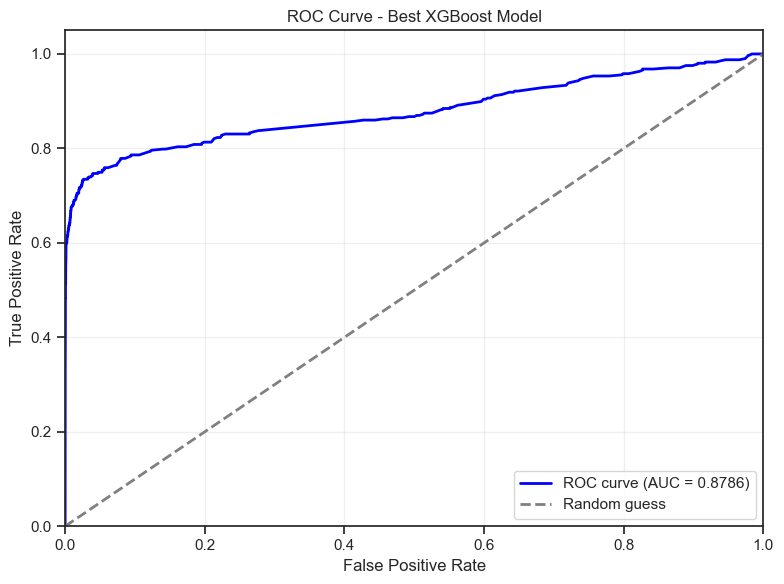

Area Under ROC Curve: 0.8786


In [49]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_rand, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Best XGBoost Model')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Area Under ROC Curve: {roc_auc:.4f}")


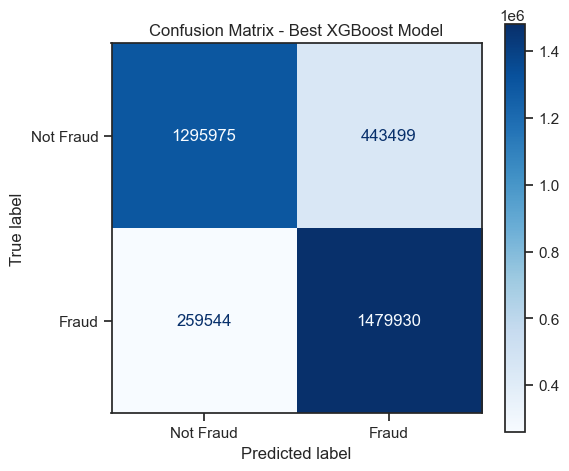


True Negatives: 1295975
False Positives: 443499
False Negatives: 259544
True Positives: 1479930


In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Get predictions (0 or 1)
y_test_pred_class = best_xgb.predict(X_over)

# Create confusion matrix
cm = confusion_matrix(y_over, y_test_pred_class)

# Plot
fig, ax = plt.subplots(figsize=(6, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fraud', 'Fraud'])
disp.plot(ax=ax, cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Best XGBoost Model')
plt.tight_layout()
plt.show()

print(f"\nTrue Negatives: {cm[0,0]}")
print(f"False Positives: {cm[0,1]}")
print(f"False Negatives: {cm[1,0]}")
print(f"True Positives: {cm[1,1]}")
